In [216]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

#### Task 1 Merging 12 csv data into one file or DataFrame

In [9]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
all_months_data = pd.DataFrame()
files = [file for file in os.listdir('./Sales_Data')]
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])

In [13]:
all_months_data.to_csv('All_Data.csv',index=False)
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Read in updated DataFrame

In [20]:
df = pd.read_csv('All_Data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Adding a Month column

In [21]:
df['Month'] = df['Order Date'].str[0:2]

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


#### Dropping Nan values

In [23]:
nan_df = df[df.isnull().any(axis=1)]
nan_df
df = df.dropna(how='any')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


#### Converting Months column data type to int32

In [24]:
df = df[df['Month'].str[0:2]!='Or'] #Cleaning the data(removing data that contains or instead on Months)

In [25]:
df['Month'] = df['Month'].astype('int32')

In [26]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


#### Converting columns to correct type

In [37]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
df['Price Each'] = df['Price Each'].astype('float64')
df['Order ID'] = df['Order ID'].astype('int64')

#### Adding a Sales Column

In [39]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Sales             185950 non-null  float64
dtypes: float64(2), int32(2), int64(1), object(3)
memory usage: 11.3+ MB


#### What was the best month for sale? and how much was earned that month?

In [69]:
print(df.groupby('Month').sum()['Sales'].sort_values(ascending=False))
results = df.groupby('Month').sum()['Sales']

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64


In [47]:
# as we can see month:12 (December was the best month for sale)

#### Plotting bar graph for the sales 

Text(0.5, 0, 'Month Number')

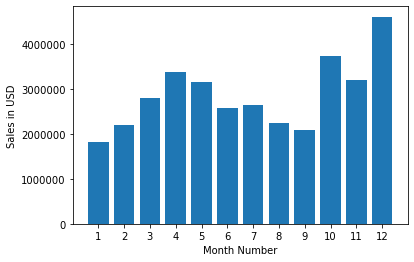

In [70]:
months = range(1,13)

plt.bar(months,results)
plt.xticks(months)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Sales in USD')
plt.xlabel('Month Number')

#### What City had the highest number of sales?

In [75]:
df['City'] = df['Purchase Address'].apply(lambda x:x.split(',')[1].strip())

In [79]:
results = df.groupby('City').sum()['Sales']
print(df.groupby('City').sum()['Sales'].sort_values(ascending=False))

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Sales, dtype: float64


In [81]:
# San Francisco had the highest sales 

In [95]:
cities = [city for city,df in df.groupby('City')]
print(cities)

['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland', 'San Francisco', 'Seattle']


Text(0.5, 0, 'City Name')

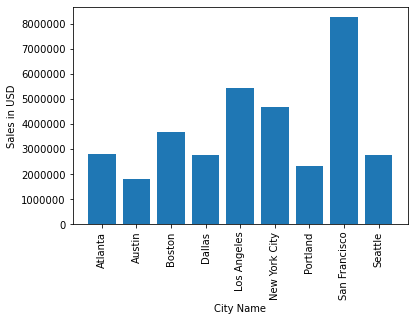

In [96]:
plt.bar(cities,results)
plt.xticks(cities)
plt.xticks(rotation=90)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Sales in USD')
plt.xlabel('City Name')

#### What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [97]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [102]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

In [103]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


In [122]:
results = df.groupby('Hour').count()
results2 = df.groupby('Hour').count()['Sales']

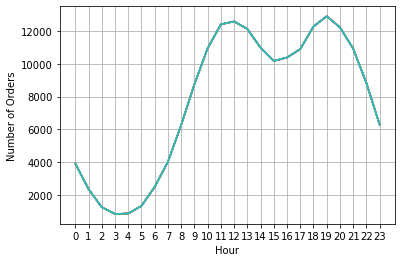

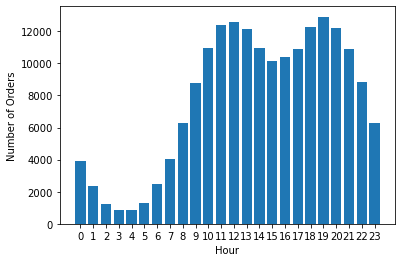

In [126]:
hour = [hour for hour,df in df.groupby('Hour')]
plt.plot(hour,results)
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.xticks(hour)
plt.grid()
plt.show()
plt.bar(hour,results2)
plt.xticks(hour)
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.show()

#### What products are most often sold together?

In [174]:
all_data = df[df['Order ID'].duplicated(keep=False)]

In [175]:
all_data['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
all_data = all_data[['Order ID','Grouped']].drop_duplicates()

In [176]:

list = all_data.groupby('Grouped').count().sort_values(by='Order ID',ascending = False)

In [179]:
#as we can see Iphone and Lightning Charging Cable was the most common product ordered together
list

,Order ID
Grouped,
"iPhone,Lightning Charging Cable",882
"Google Phone,USB-C Charging Cable",856
"iPhone,Wired Headphones",361
"Vareebadd Phone,USB-C Charging Cable",312
"Google Phone,Wired Headphones",303
...,...
"LG Dryer,27in FHD Monitor",1
"LG Dryer,27in 4K Gaming Monitor",1
"Google Phone,Wired Headphones,USB-C Charging Cable",1


#### What product sold the most? Why do you think it sold the most?

In [191]:
product_order = df.groupby('Product').sum()['Quantity Ordered']
print(df.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending = False))

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32


In [192]:
# as we can see AAA Batteries(4-Pack) was the most sold item

In [193]:
product = [product for product,df in df.groupby('Product')]
product

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

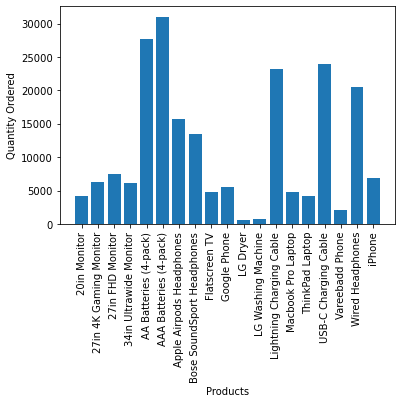

In [197]:
plt.bar(product,product_order)
plt.xticks(rotation=90)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

In [203]:
prices = df.groupby('Product').mean()['Price Each']

C:\Users\HP\AppData\Local\Temp/ipykernel_2980/1714924781.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation='vertical',size=8)


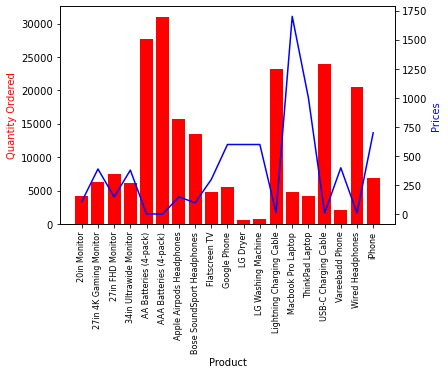

In [224]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, product_order,color = 'r')
ax2.plot(product, prices,'b-')

ax1.set_xlabel('Product')
ax1.set_xticklabels(product,rotation='vertical',size=8)
ax1.set_ylabel('Quantity Ordered', color='r')
ax2.set_ylabel('Prices', color='b')

plt.show()